# Machine Learning 109 fall Hw2

撰寫一個 python 程式利用 pandas 讀取 HW2_data.csv 資料

## 轉換DataFrame格式

In [1]:
import pandas as pd
import numpy as np
rawData = pd.read_csv( 'HW2_data.csv' )
data = { 'Name' : rawData['0'].unique() }
rebuildData = pd.DataFrame( data, columns = ['Name', 'Sex', 'Age', 'HR', 'Height', 'Weight', 'BP'] )
rebuildData.set_index('Name', inplace = True )
# set Name as dataframe index
for index, row in rawData.iterrows():
    rebuildData[row['1']][row['0']] = row['2']
rebuildData.reset_index( inplace = True )

In [3]:
rebuildData

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37,80,165,72,131
1,Avery,F,66,72,159,54,121
2,Joseph,M,42,NaN,168,70,110
3,Jackson,M,46,81,170,64,97
4,Nora,F,48,82,153,59,93
5,Aiden,M,38,93,166,69,136
6,Evelyn,F,60,67,168,60,106
7,Zoey,F,37,79,NaN,NaN,112
8,Matthew,M,69,85,166,70,128
9,Layla,F,12,87,156,47,142


## 計算出 Age, HR, Height, Weight 及 BP 的平均值加於 dataframe 最下列。

In [4]:
# rebuildData['Age'] = pd.to_numeric( rebuildData['Age'] )
# add average row at the end
rebuildData['Age'] = rebuildData['Age'].astype('float').astype('Int64')
rebuildData['HR'] = rebuildData['HR'].astype('float').astype('Int64')
rebuildData['Height'] = rebuildData['Height'].astype('float').astype('Int64')
rebuildData['Weight'] = rebuildData['Weight'].astype('float').astype('Int64')
rebuildData['BP'] = rebuildData['BP'].astype('float').astype('Int64')
rebuildData = rebuildData.append( { 'Name' : 'AVG', 'Age' : rebuildData['Age'].mean( skipna = True ), 'HR' : rebuildData['HR'].mean( skipna = True ), 'Height' : rebuildData['Height'].mean( skipna = True ), 'Weight' : rebuildData['Weight'].mean( skipna = True ), 'BP' : rebuildData['BP'].mean( skipna = True ) }, ignore_index=True )
rebuildData.tail()

,Name,Sex,Age,HR,Height,Weight,BP
46,Logan,M,62,87,177,76,NaN
47,Oliver,M,45,62,184,66,139
48,Benjamin,M,39,72,164,68,122
49,Amelia,F,66,NaN,151,49,119
50,AVG,NaN,45.84,78.1163,167.545,61.5909,121.222


## 利用程式找出並於螢幕列出各分項指標 feature（Age, HR, Height, Weight 及 BP）中之最大者的姓名（Name）。

In [6]:
print( 'Age\tMaximum person : '+rebuildData['Name'][np.argmax( pd.to_numeric( rebuildData['Age'] ) )] )
# argmax is used to find out the argument stream number of the max value
print( 'HR\tMaximum person : '+rebuildData['Name'][np.argmax( pd.to_numeric( rebuildData['HR'] ) )] )
print( 'Height\tMaximum person : '+rebuildData['Name'][np.argmax( pd.to_numeric( rebuildData['Height'] ) )] )
print( 'Weight\tMaximum person : '+rebuildData['Name'][np.argmax( pd.to_numeric( rebuildData['Weight'] ) )] )
print( 'BP\tMaximum person : '+rebuildData['Name'][np.argmax( pd.to_numeric( rebuildData['BP'] ) )] )

Age	Maximum person : Madison
HR	Maximum person : Liam
Height	Maximum person : Mason
Weight	Maximum person : Mason
BP	Maximum person : Lucas


## 請繪製身高體重（Height, Weigth）之散佈圖（Scatter Plot），女生請以紅點標示，男生請以藍點標示。

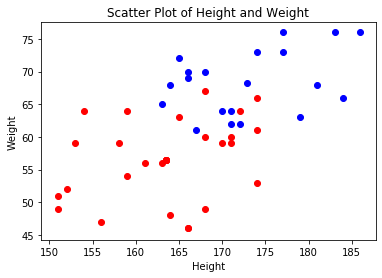

In [12]:
import matplotlib.pyplot as plt 

rebuildData.set_index( 'Sex', inplace = True )
# set index as Sex
xHeight_M = rebuildData['Height']['M']
yWeight_M = rebuildData['Weight']['M']
xHeight_F = rebuildData['Height']['F']
yWeight_F = rebuildData['Weight']['F']
# classfy male, female 

xHeight_M = xHeight_M.fillna( xHeight_M.mean() )
yWeight_M = yWeight_M.fillna( yWeight_M.mean() )
xHeight_F = xHeight_F.fillna( xHeight_F.mean() )
yWeight_F = yWeight_F.fillna( yWeight_F.mean() )
# fill in the NaN block

rebuildData.reset_index( inplace = True )
# reset index

plt.scatter( xHeight_M, yWeight_M, c = 'blue' ) 
plt.scatter( xHeight_F, yWeight_F, c = 'red' ) 

plt.xlabel( 'Height' )
plt.ylabel( 'Weight' )
plt.title( 'Scatter Plot of Height and Weight' )
# To show the plot 
plt.show() 

## 繪製不同年齡（Age）區間的人數直方圖及圓餅圖（Pie Chart）。請依1-10, 11-20, 21-30…每 10 歲為一個區間統計。

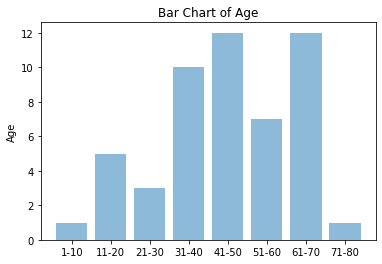

In [9]:
# buckets = [0, 10, 20, 30, 40]
# buckets_name = ['1-10', '11-20', '21-30', '31-40']
# pd.cut(rebuildData['Age'], buckets , labels = buckets_name)
objects = ( '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80' )
y_pos = np.arange( len( objects ) )
quantity = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range( len( rebuildData['Age'] ) ) :
    quantity[int( ( rebuildData['Age'][i]-1 )/10 )] += 1

plt.bar( y_pos, quantity, align = 'center', alpha = 0.5 )
plt.xticks( y_pos, objects )
plt.ylabel( 'Age' )
plt.title( 'Bar Chart of Age' )

plt.show()

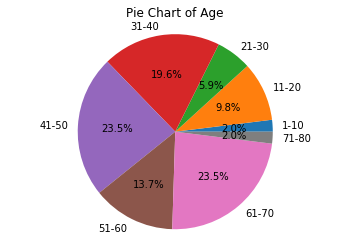

In [10]:
plt.pie( quantity , labels = objects, autopct = '%1.1f%%' )
plt.axis('equal')
plt.title( 'Pie Chart of Age' )
plt.show()

## 繪製男女性別分佈比例之圓餅圖（Pie Chart）。

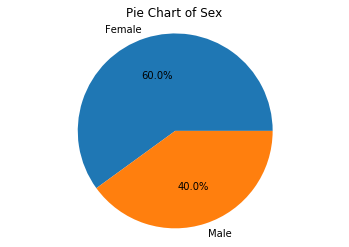

In [11]:
sexCount = rebuildData['Sex'].value_counts()
# https://kknews.cc/zh-tw/code/2nyeg3e.html
sex = ( 'Female', 'Male' )
plt.pie( sexCount , labels = sex, autopct = '%1.1f%%' )
plt.axis( 'equal' )
plt.title( 'Pie Chart of Sex' )
plt.show()